In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from numpy.linalg import inv,svd
import numpy as np

dataset=load_diabetes()


In [2]:
features,label=dataset['data'],dataset['target']
features.shape,label.shape

((442, 10), (442,))

In [3]:
X=features
Y=label

In [4]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [5]:
X_train.shape

(353, 10)

### Initialization

In [6]:
m=len(X_train)

X_train=np.c_[np.ones((m, 1)), X_train] # in the equation y=B0+B1*x1+B2*x2...B0 is initialized as a vector of ones
X_test=np.c_[np.ones((len(X_test), 1)), X_test]
n_features=X_train.shape[1]
X_transpose=X_train.T
 
theta=np.random.uniform(0.1,1, (n_features, 1))

learning_rate=0.001
iterations=100

In [7]:
theta.shape

(11, 1)

## 1. Gradient Descent 

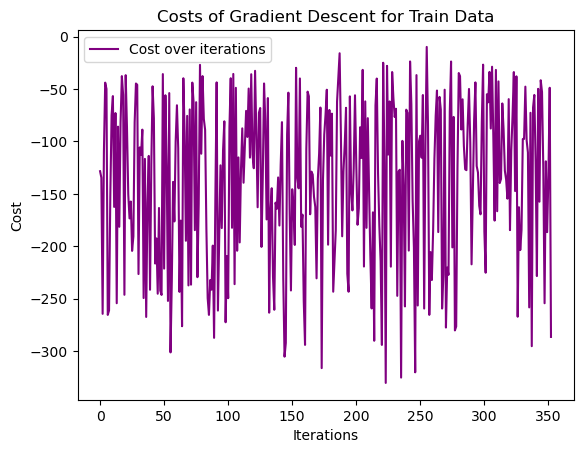

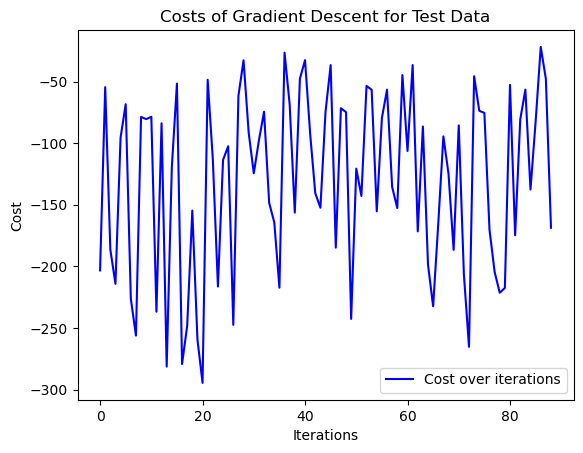

In [8]:



for _ in range(iterations):
    gradient=(1/m)*(X_transpose)@(X_train@theta-Y_train.reshape(353,1))
    theta-=learning_rate*(gradient)
Y_predicted_best_fit_line_on_train=X_train@theta
Y_predicted_best_fit_line_on_test=X_test@theta


cost_list_train = []
for i in range(0,len(Y_train)):
    cost_list_train.append(Y_predicted_best_fit_line_on_train[i]-Y_train[i])

cost_list_test = []
for i in range(0,len(Y_test)):
    cost_list_test.append(Y_predicted_best_fit_line_on_test[i]-Y_test[i])   
    
    
plt.plot(cost_list_train, color="purple", label="Cost over iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Costs of Gradient Descent for Train Data")
plt.legend()   
plt.show()
             
plt.plot(cost_list_test, color="blue", label="Cost over iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Costs of Gradient Descent for Test Data")
plt.legend()   

plt.show()



## 2. Least Squares

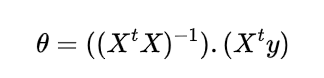

### 1. Without iterations 

In [9]:
theta_ls=np.linalg.inv(X_transpose.dot(X_train)).dot(X_transpose).dot(Y_train)
theta_ls.reshape(11,1)

array([[ 151.34565535],
       [  37.90031426],
       [-241.96624835],
       [ 542.42575342],
       [ 347.70830529],
       [-931.46126093],
       [ 518.04405547],
       [ 163.40353476],
       [ 275.31003837],
       [ 736.18909839],
       [  48.67112488]])

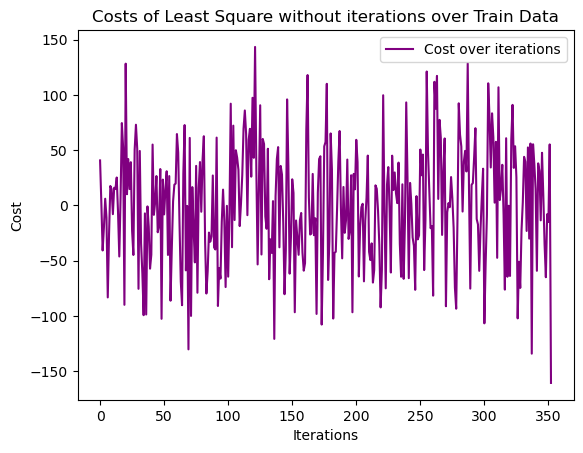

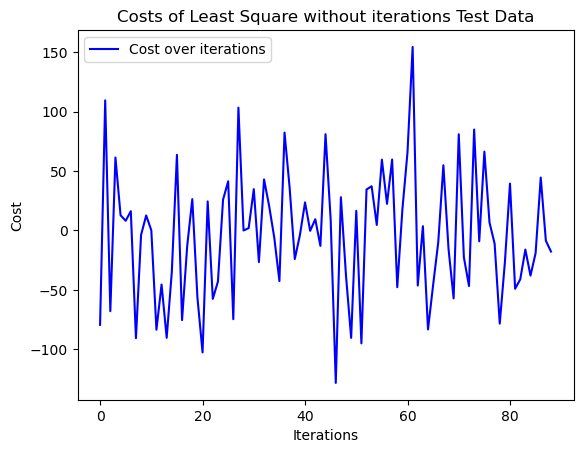

In [10]:
Y_predicted_best_fit_line_on_train_ls=X_train@theta_ls
Y_predicted_best_fit_line_on_test_ls=X_test@theta_ls

cost_list_train = []


for i in range(0,len(Y_train)):
    cost_list_train.append(Y_predicted_best_fit_line_on_train_ls[i]-Y_train[i])
    
    
cost_list_test = []


for i in range(0,len(Y_test)):
    cost_list_test.append(Y_predicted_best_fit_line_on_test_ls[i]-Y_test[i])

plt.plot(cost_list_train, color="purple", label="Cost over iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Costs of Least Square without iterations over Train Data")
plt.legend()
plt.show()

plt.plot(cost_list_test, color="blue", label="Cost over iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Costs of Least Square without iterations Test Data")
plt.legend()
plt.show()




### 2. With iterations 

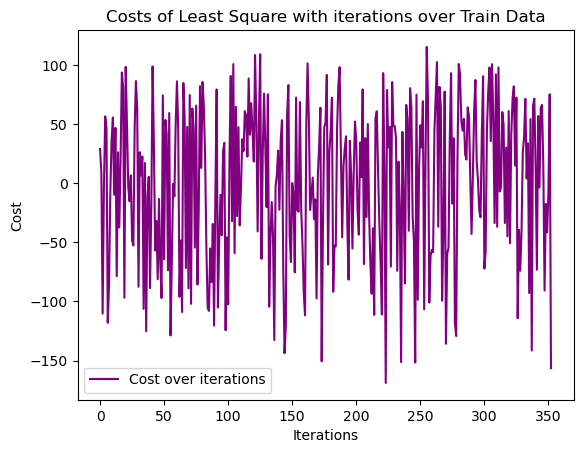

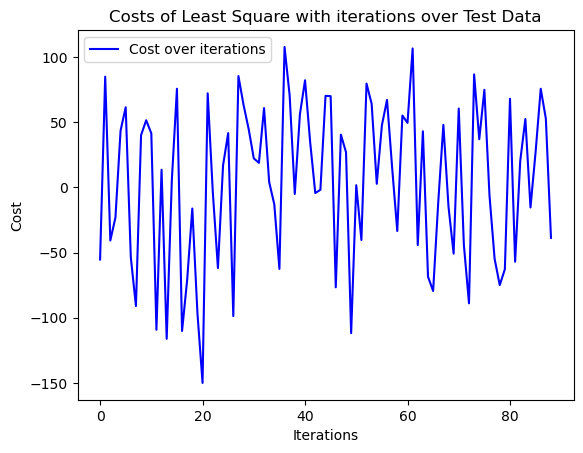

In [11]:
theta=np.random.uniform(0.1,1, (n_features, 1))


for j in range(iterations):
    gradient = np.zeros_like(theta)
    for i in range(X_train.shape[0]):
        gradient += (
            -2 * (Y_train[i] - (X_train[i].T @ theta)[0]) * X_train[i].T.reshape(11,1)
        )
        
    theta -= gradient * learning_rate

Y_predicted_best_fit_line_on_ls_with_iterations_train=X_train@theta
Y_predicted_best_fit_line_on_ls_with_iterations_test=X_test@theta

cost_list_train = []


for i in range(0,len(Y_train)):
    cost_list_train.append(Y_predicted_best_fit_line_on_ls_with_iterations_train[i]-Y_train[i])
    
    
cost_list_test = []


for i in range(0,len(Y_test)):
    cost_list_test.append(Y_predicted_best_fit_line_on_ls_with_iterations_test[i]-Y_test[i])

plt.plot(cost_list_train, color="purple", label="Cost over iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Costs of Least Square with iterations over Train Data")
plt.legend()
plt.show()

plt.plot(cost_list_test, color="blue", label="Cost over iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Costs of Least Square with iterations over Test Data")
plt.legend()
plt.show()





## 3. ADAM Optimizer

In [12]:

W = np.random.rand(11, 1)          

class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        
        self.V_dw = None  
        self.S_dw = None  
        self.t = 0        

    def update(self, W, gradient):
        if self.V_dw is None:
            self.V_dw = np.zeros_like(gradient)  
        if self.S_dw is None:
            self.S_dw = np.zeros_like(gradient)  
        self.t += 1  # Increment time step
        self.V_dw = self.beta1 * self.V_dw + (1 - self.beta1) * gradient
        self.S_dw = self.beta2 * self.S_dw + (1 - self.beta2) * (gradient ** 2)
        m_hat = self.V_dw / (1 - self.beta1 ** self.t)
        v_hat = self.S_dw / (1 - self.beta2 ** self.t)
        n_dash = self.learning_rate / (np.sqrt(v_hat) + self.epsilon)
        W -= n_dash * m_hat

optimizer = AdamOptimizer(learning_rate=0.01)

for epoch in range(100):  
    for i in range(X_train.shape[0]):  
        xi = X_train[i].reshape(-1, 1)  
        yi = Y_train[i]                  
        prediction = np.dot(W.T, xi)     
        error = prediction - yi           
        gradient = xi * error             
        optimizer.update(W, gradient)

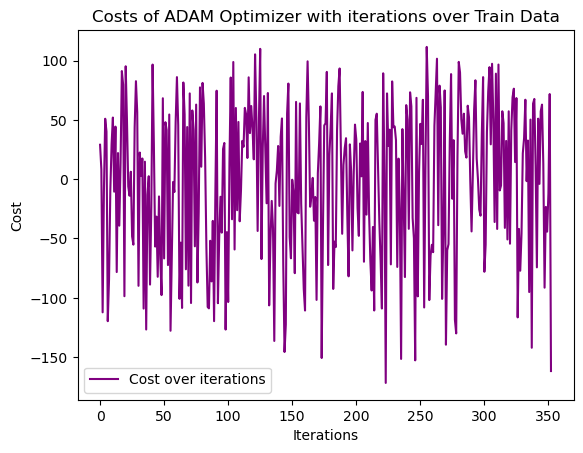

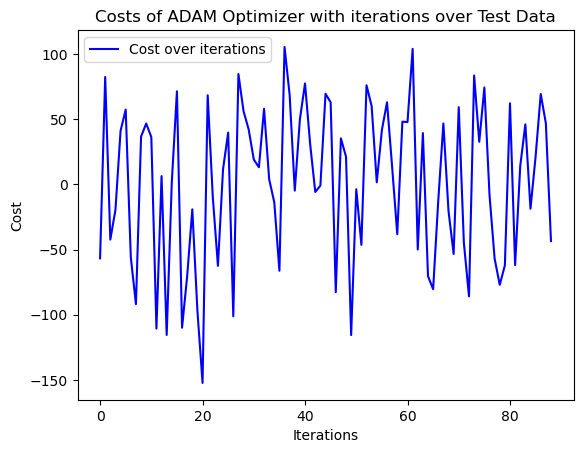

In [13]:
Y_predicted_best_fit_line_on_adam_train=X_train@W
Y_predicted_best_fit_line_on_adam_test=X_test@W

cost_list_train = []


for i in range(0,len(Y_train)):
    cost_list_train.append(Y_predicted_best_fit_line_on_adam_train[i]-Y_train[i])
    
    
cost_list_test = []


for i in range(0,len(Y_test)):
    cost_list_test.append(Y_predicted_best_fit_line_on_adam_test[i]-Y_test[i])

plt.plot(cost_list_train, color="purple", label="Cost over iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Costs of ADAM Optimizer with iterations over Train Data")
plt.legend()
plt.show()

plt.plot(cost_list_test, color="blue", label="Cost over iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Costs of ADAM Optimizer with iterations over Test Data")
plt.legend()
plt.show()




## 4. Singular Value Decomposition

In [14]:
U, singular_values, VT = svd(X_train)
m, n = X_train.shape
S_matrix = np.zeros((m, n))
np.fill_diagonal(S_matrix, singular_values)

S_inverse = np.zeros((n, m))  
for i in range(min(m, n)):
    if singular_values[i] != 0:
        S_inverse[i, i] = 1 / singular_values[i]


U_transpose = U.T
V = VT.T  


In [15]:
S_matrix.shape

(353, 11)

In [16]:
theta=(V@S_inverse)@(U_transpose@Y_train)
theta=theta.reshape(11,1)

In [17]:
theta.shape

(11, 1)

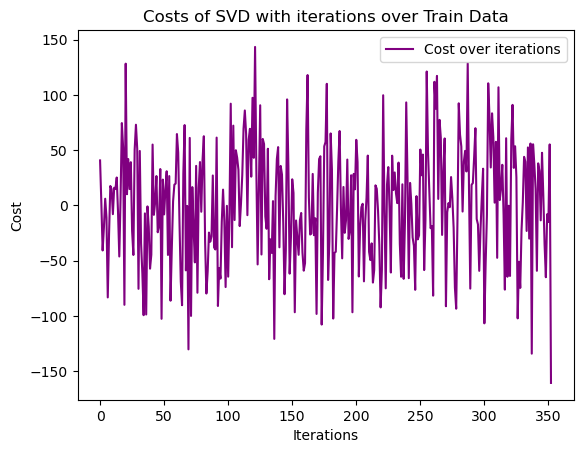

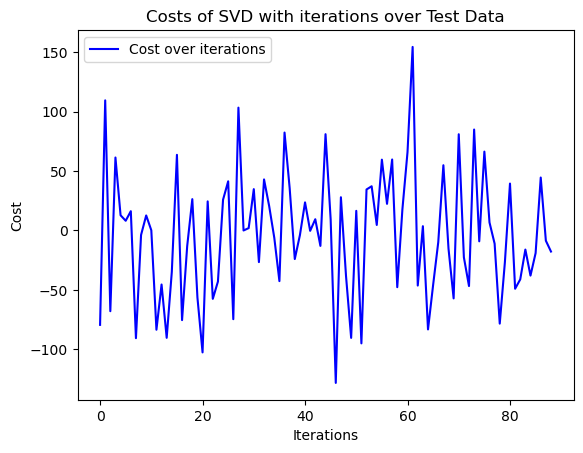

In [18]:
Y_predicted_best_fit_line_on_train_svd=X_train@theta
Y_predicted_best_fit_line_on_test_svd=X_test@theta

cost_list_train = []


for i in range(0,len(Y_train)):
    cost_list_train.append(Y_predicted_best_fit_line_on_train_svd[i]-Y_train[i])
    
    
cost_list_test = []


for i in range(0,len(Y_test)):
    cost_list_test.append(Y_predicted_best_fit_line_on_test_svd[i]-Y_test[i])

plt.plot(cost_list_train, color="purple", label="Cost over iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Costs of SVD with iterations over Train Data")
plt.legend()
plt.show()

plt.plot(cost_list_test, color="blue", label="Cost over iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Costs of SVD with iterations over Test Data")
plt.legend()
plt.show()



